# Explore here

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV




In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

save_path = r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\DECISIONTREE\DecisionTreeProject\data\raw\DT_Diabetes.csv" 

# We save the csv file
df.to_csv(save_path, index=False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We begin by getting the data ready to be analysed. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.
    
    Pregnancies. Number of pregnancies of the patient (numeric)
    Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
    BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
    SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
    Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
    BMI. Body mass index (numeric)
    DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
    Age. Age of patient (numeric)
    Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

We begin by checking if there are any duplicates.

In [3]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We will quickly check if there is obvious issues on the head or the tail of the dataframe

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


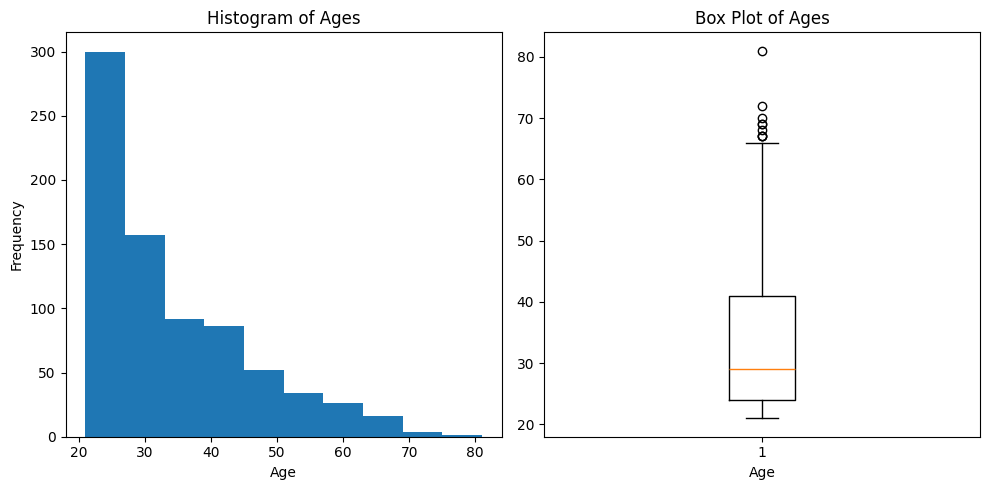

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['Age'], bins=10)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Ages')

# Box plot on the right
axes[1].boxplot(df['Age'])
axes[1].set_xlabel('Age')
axes[1].set_title('Box Plot of Ages')

plt.tight_layout()
plt.show()

We can see how must of the people in this test are between 20 and 30 year olds. We have some outliers over the age of 65. To avoid the decision tree to create splits for those outliers specifically, we will turn all those over 65 to 65 (Representing those that are 65 or more)

In [8]:
# We change those values that are greater than 65 into 65.
df['Age'] = df['Age'].apply(lambda x: 65 if x > 65 else x)

We will now check the column Pregnancies.

In [9]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

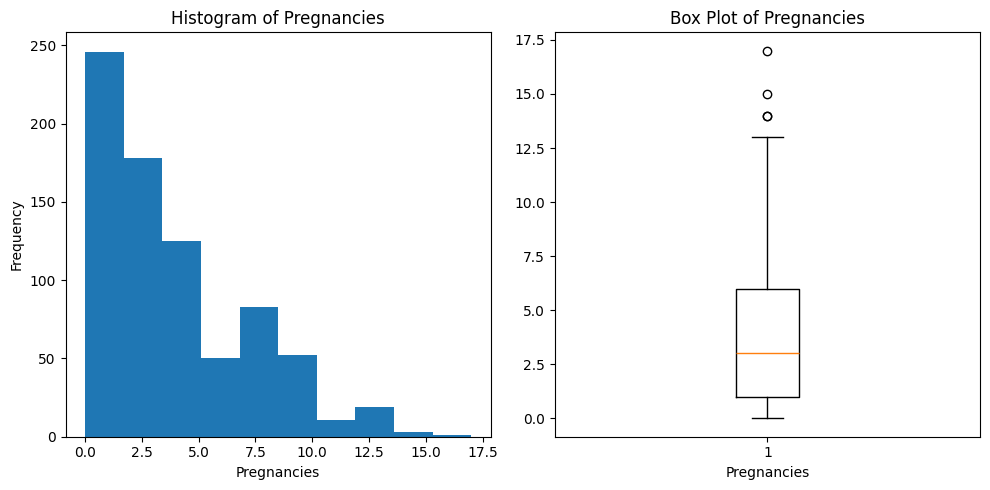

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['Pregnancies'], bins=10)
axes[0].set_xlabel('Pregnancies')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Pregnancies')

# Box plot on the right
axes[1].boxplot(df['Pregnancies'])
axes[1].set_xlabel('Pregnancies')
axes[1].set_title('Box Plot of Pregnancies')

plt.tight_layout()
plt.show()

Like we previously did, we will adjust the outliers to the maximum value to avoid overfitting in the splits for 12 or more pregnancies

In [11]:
df['Pregnancies'] = df['Pregnancies'].apply(lambda x: 12 if x > 12 else x)

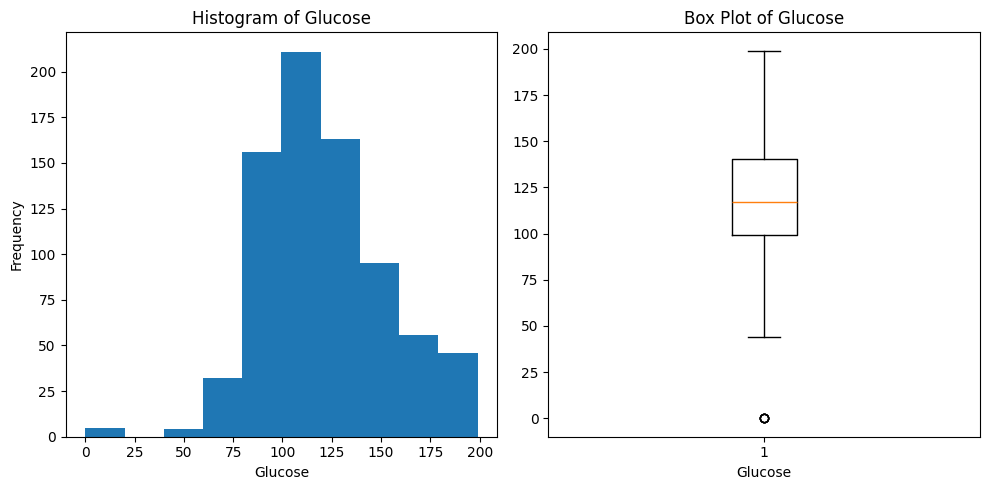

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['Glucose'], bins=10)
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Glucose')

# Box plot on the right
axes[1].boxplot(df['Glucose'])
axes[1].set_xlabel('Glucose')
axes[1].set_title('Box Plot of Glucose')

plt.tight_layout()
plt.show()

Let's see the outlier to analyse it

In [13]:
outliers = df[df['Glucose'].lt(df['Glucose'].quantile(0.25) - 1.5 * df['Glucose'].quantile(0.75) - df['Glucose'].quantile(0.25))]

outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
sorted_glucose = df['Glucose'].sort_values()

sorted_glucose

75       0
349      0
342      0
502      0
182      0
      ... 
408    197
579    197
228    197
561    198
661    199
Name: Glucose, Length: 768, dtype: int64

After reviewing the meaning of the Glucose column, it is possible that there are many people that have 0 glucose after the test, and, it is not an outlier, however, it might look like it for the reduced ammount of people. We will not modify it.

We will now look at Blood Pressure

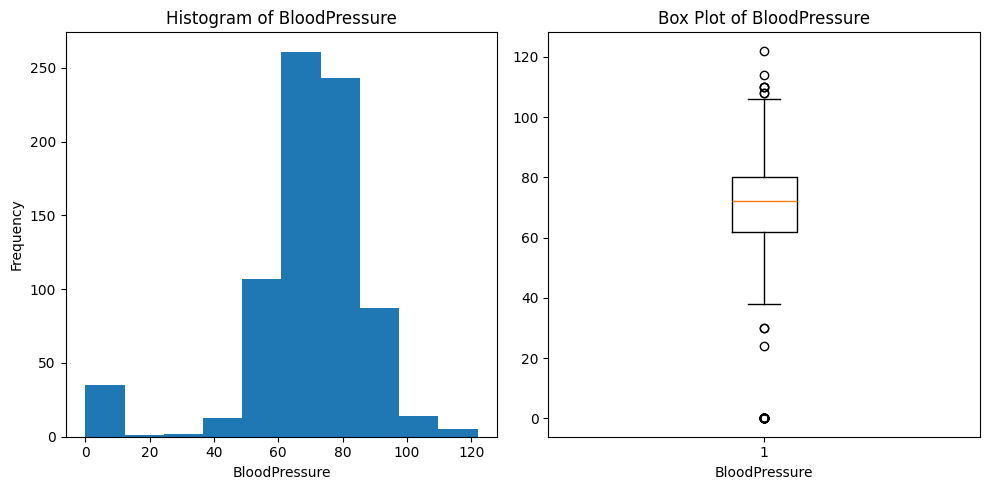

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['BloodPressure'], bins=10)
axes[0].set_xlabel('BloodPressure')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BloodPressure')

# Box plot on the right
axes[1].boxplot(df['BloodPressure'])
axes[1].set_xlabel('BloodPressure')
axes[1].set_title('Box Plot of BloodPressure')

plt.tight_layout()
plt.show()

There is deffinitely some errors here, for Blood Pressure cannot be = 0 for a living person.

In [16]:
# We will replace the 0 values for nan.
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)


In [17]:
bp_stats = df['BloodPressure'].describe()
print("Blood Pressure Statistics after cleaning:")
print(bp_stats)

Blood Pressure Statistics after cleaning:
count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [18]:
# We will use KNN to fill the nan values.
features_for_imputation = ['BloodPressure', 'Age', 'BMI', 'Glucose']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_for_imputation]), columns=features_for_imputation)

# We perform knn imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_scaled)

# We replace the blood pressure column in dataframe with the imputed values
df['BloodPressure'] = scaler.inverse_transform(imputed_data)[:, 0]


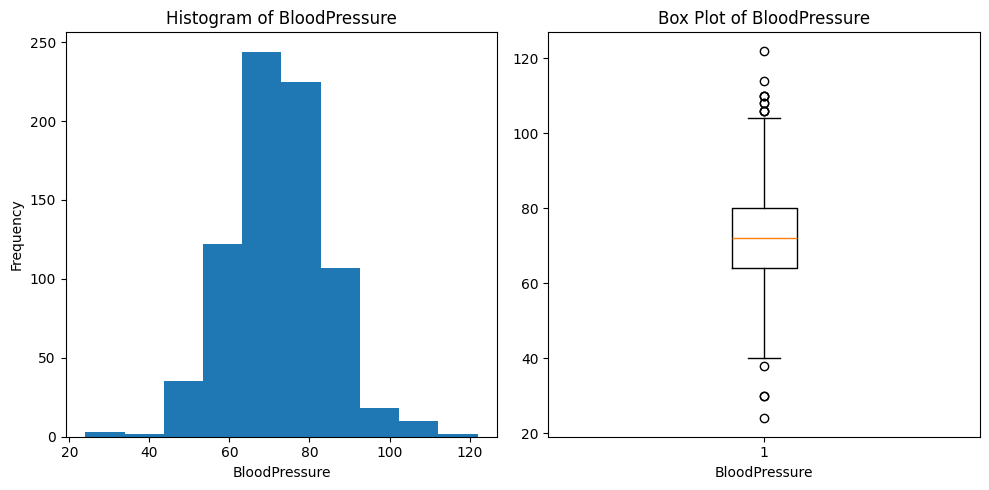

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['BloodPressure'], bins=10)
axes[0].set_xlabel('BloodPressure')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BloodPressure')

# Box plot on the right
axes[1].boxplot(df['BloodPressure'])
axes[1].set_xlabel('BloodPressure')
axes[1].set_title('Box Plot of BloodPressure')

plt.tight_layout()
plt.show()

We successfully transformed the values 0 to nan and filled them up with knn. We decide to keep the outliers in this case.

When checking Skin Thickness, we have the same issue, 0 is not a possible vaule.

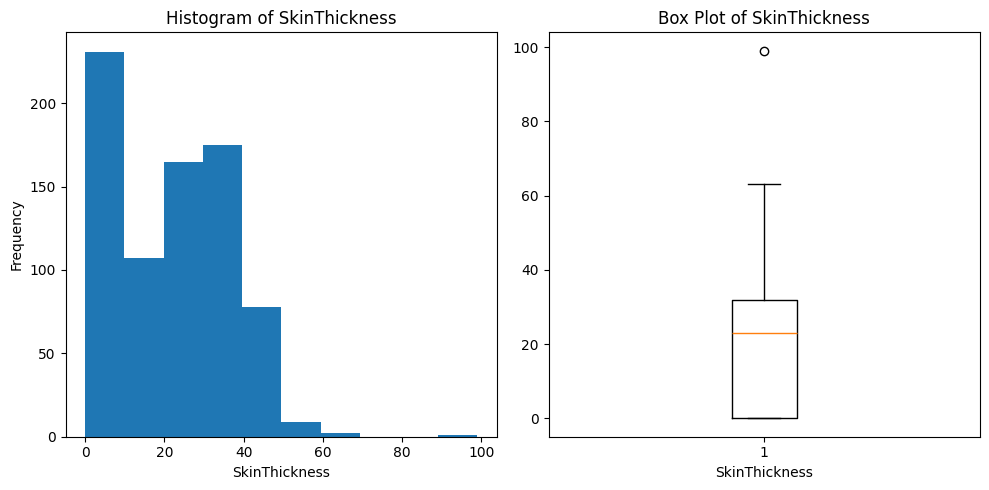

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['SkinThickness'], bins=10)
axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of SkinThickness')

# Box plot on the right
axes[1].boxplot(df['SkinThickness'])
axes[1].set_xlabel('SkinThickness')
axes[1].set_title('Box Plot of SkinThickness')

plt.tight_layout()
plt.show()

In [21]:
high_thickness = df[df['SkinThickness'] >= 60]
# Mostrar estas instancias
print("Instances with SkinThickness >= 60:")
print(high_thickness.to_string())

Instances with SkinThickness >= 60:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
57             0      100           88.0             60      110  46.8                     0.962   31        0
445            0      180           78.0             63       14  59.4                     2.420   25        1
579            2      197           70.0             99        0  34.7                     0.575   62        1


In [22]:
# We will change the sking thickness from those values above 60 as 60, for there is only one outlier, and it is at the limit of the grou representation.
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: 60 if x > 60 else x)

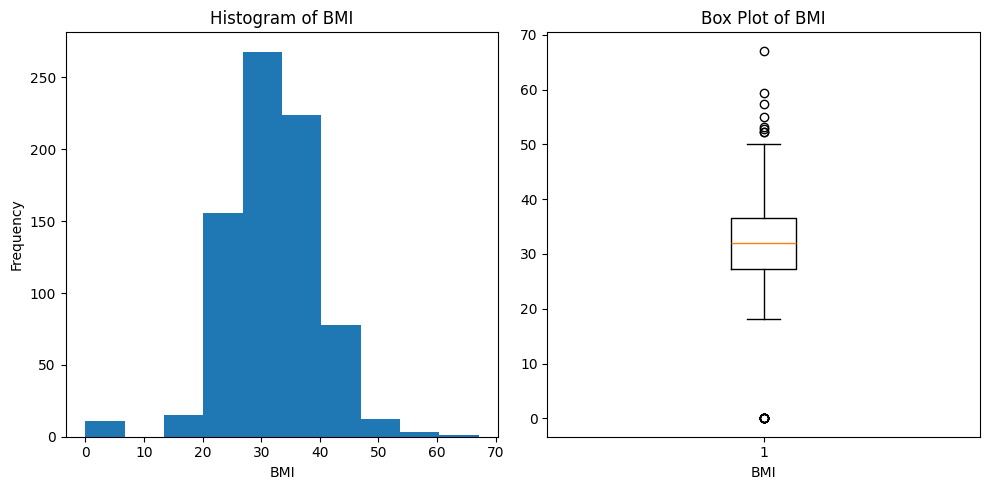

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['BMI'], bins=10)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BMI')

# Box plot on the right
axes[1].boxplot(df['BMI'])
axes[1].set_xlabel('BMI')
axes[1].set_title('Box Plot of BMI')

plt.tight_layout()
plt.show()

BMI Cannot be = to 0.

In [24]:
df['BMI'] = df['BMI'].replace(0, np.nan)


We will use knn again but for the BMI.

In [25]:
# We will use KNN to fill the nan values.
features_for_imputation = ['BloodPressure', 'Age', 'BMI', 'Glucose']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_for_imputation]), columns=features_for_imputation)

# We perform knn imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_scaled)

# We replace the blood pressure column in dataframe with the imputed values
df['BMI'] = scaler.inverse_transform(imputed_data)[:, 0]


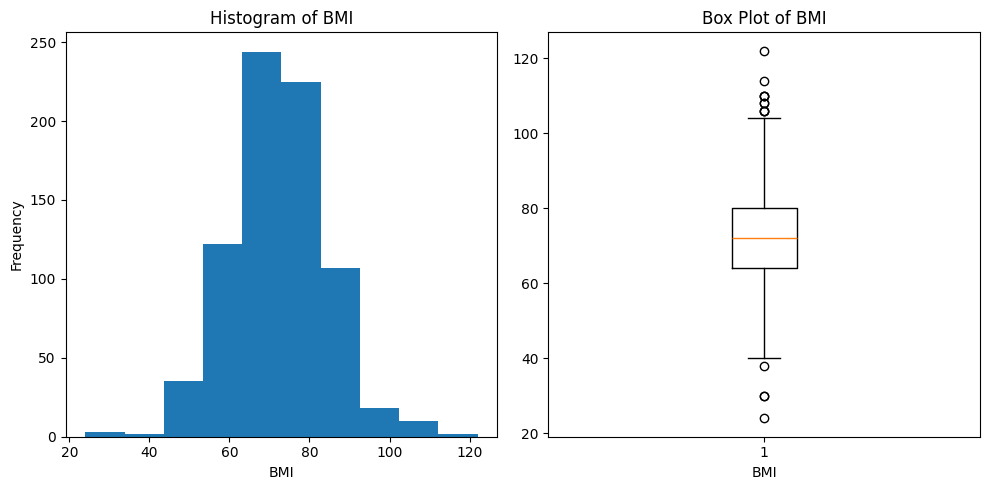

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['BMI'], bins=10)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BMI')

# Box plot on the right
axes[1].boxplot(df['BMI'])
axes[1].set_xlabel('BMI')
axes[1].set_title('Box Plot of BMI')

plt.tight_layout()
plt.show()

We will not modify more data on this column, as we don't want to influence too much into the results of the tree.

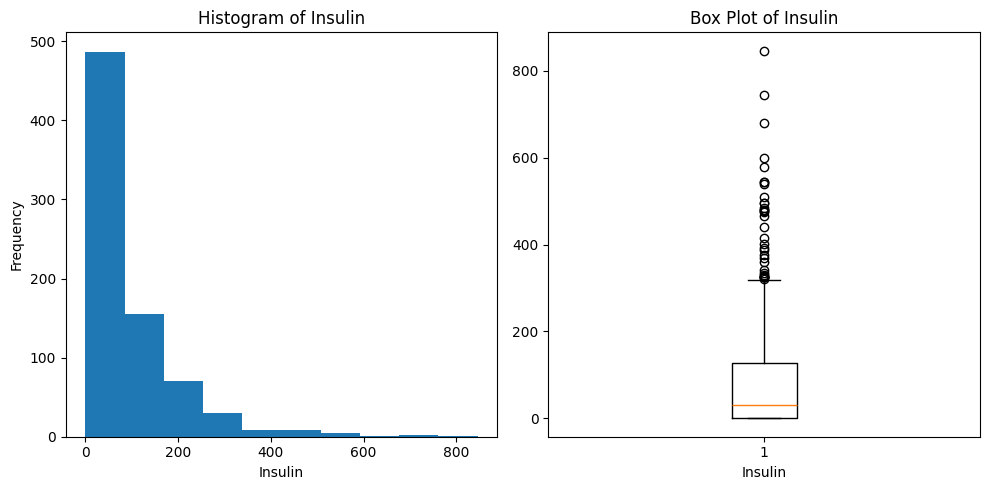

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['Insulin'], bins=10)
axes[0].set_xlabel('Insulin')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Insulin')

# Box plot on the right
axes[1].boxplot(df['Insulin'])
axes[1].set_xlabel('Insulin')
axes[1].set_title('Box Plot of Insulin')

plt.tight_layout()
plt.show()

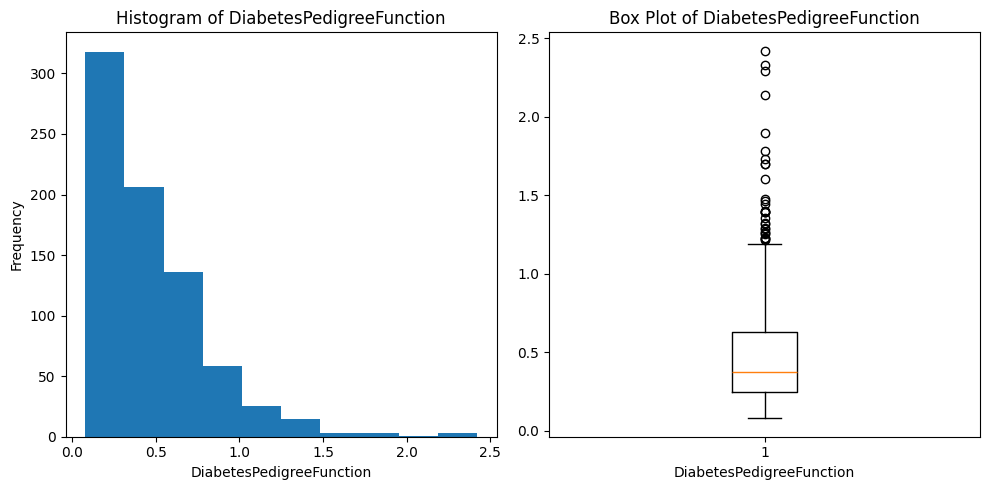

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histogram on the left
axes[0].hist(df['DiabetesPedigreeFunction'], bins=10)
axes[0].set_xlabel('DiabetesPedigreeFunction')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of DiabetesPedigreeFunction')

# Box plot on the right
axes[1].boxplot(df['DiabetesPedigreeFunction'])
axes[1].set_xlabel('DiabetesPedigreeFunction')
axes[1].set_title('Box Plot of DiabetesPedigreeFunction')

plt.tight_layout()
plt.show()

We believe these two last column will probably have a big impact into the results, and there are some values that we don't completely understand due to not knowing medicine, we will leave them like this for the test and training of the tree.

SPLIT DE INFORMACIÓN PARA TRAIN Y TEST

In [29]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# We will discard one of the columns 
selected_model = SelectKBest(k = 7)
selected_model.fit(X_train, y_train)

selected_columns = X_train.columns[selected_model.get_support()]
X_train_sel = pd.DataFrame(selected_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selected_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,68.2,0.0,68.2,0.304,21.0
1,9.0,112.0,82.0,0.0,82.0,1.282,50.0
2,1.0,139.0,46.0,83.0,46.0,0.654,22.0
3,0.0,161.0,50.0,0.0,50.0,0.254,65.0
4,6.0,134.0,80.0,370.0,80.0,0.238,46.0


In [30]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,58.0,0.430,43.0
1,2.0,112.0,75.0,0.0,75.0,0.148,21.0
2,2.0,108.0,64.0,0.0,64.0,0.158,21.0
3,8.0,107.0,80.0,0.0,80.0,0.856,34.0
4,7.0,136.0,90.0,0.0,90.0,0.210,50.0


In [31]:
# We save the train and test values into csv for easier access and testing.
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

We will now design the decision tree model

In [32]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,68.2,0.0,68.2,0.304,21.0,0
1,9.0,112.0,82.0,0.0,82.0,1.282,50.0,1
2,1.0,139.0,46.0,83.0,46.0,0.654,22.0,0
3,0.0,161.0,50.0,0.0,50.0,0.254,65.0,0
4,6.0,134.0,80.0,370.0,80.0,0.238,46.0,1


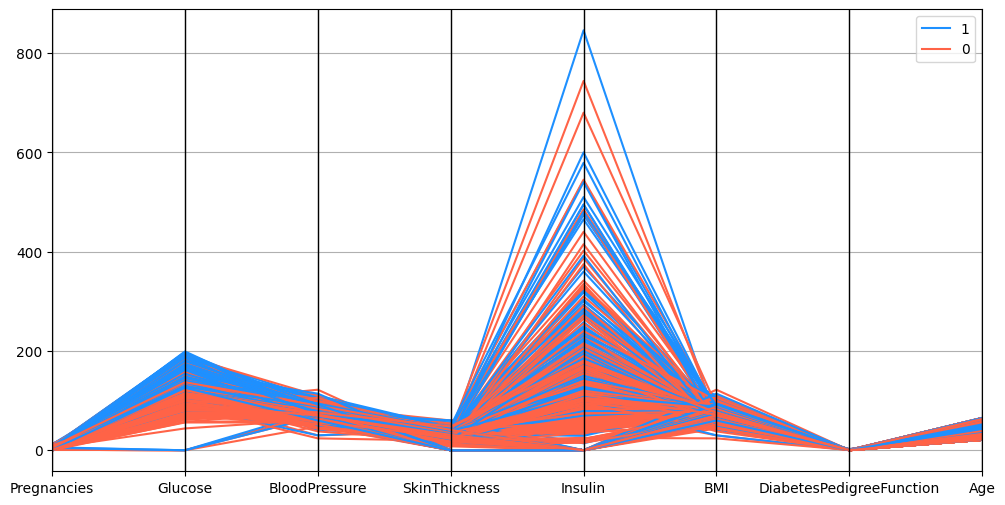

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#1E90FF", "#FF6347", "#32CD32"))

plt.show()

In [34]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [35]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

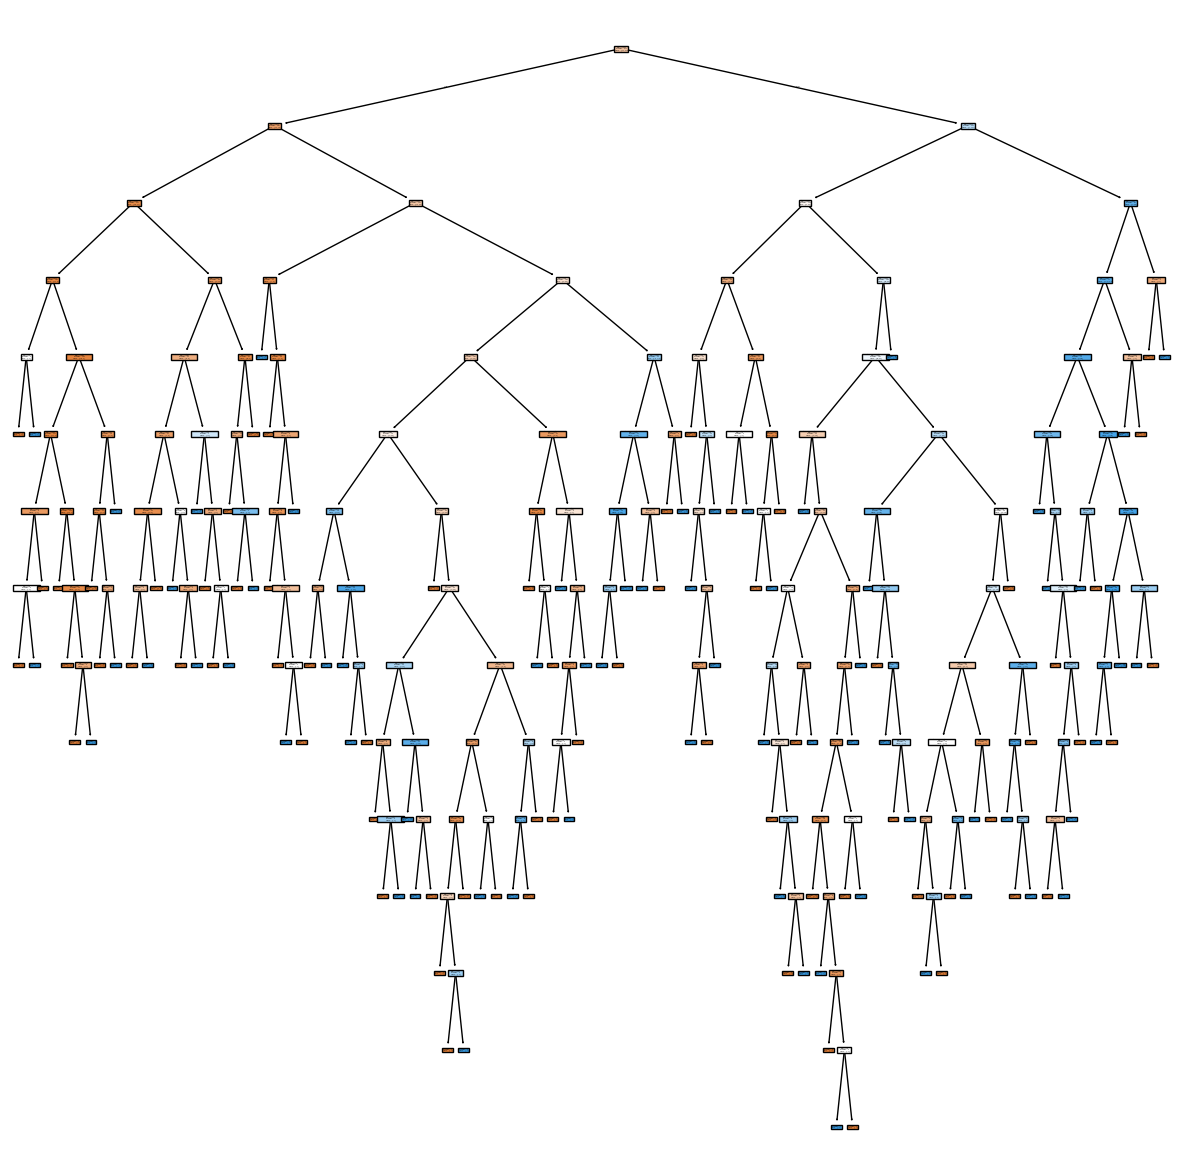

In [36]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)

plt.show()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [38]:
print(f'This is the accuracy_score: {accuracy_score(y_test, y_pred)}')

This is the accuracy_score: 0.6623376623376623


We will proceed to optimise the model

In [39]:
hyperparams = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10, 12, 15],
    'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20],
                         'min_samples_split': [2, 5, 10, 12, 15]},
             scoring='accuracy')

In [40]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [45]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 20, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       random_state=42)

In [46]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7532467532467533

In [49]:
from pickle import dump

dump(model, open("../models/TreeClasifierModel.sav", "wb"))